# 1.2 Equilibrium-consecutive reaction system in a batch reactor: A <-> B -> C

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(formatter={'float': "{0:0.9f}".format})

def reaction(t, c, k1, k_1, k2):
    f = np.zeros_like(c)
    r1 = k1*c[0] - k_1*c[1]
    r2 = k2*c[1]
    f[0] = -r1
    f[1] = r1 - r2
    f[2] = r2
    return f

k1, k_1, k2 = 2.0, 1.0, 3.0     # reaction rate constants [1/s]
c0 = [1.0, 0.0, 0.0]            # initial concentrations [mol/m3]
t_end = 2.0                     # end time [s]
dt = 0.1                        # time step [s] 

# a) Forward Euler Discretization

t: 0.0000, c: [1.000000000 0.000000000 0.000000000]
t: 0.1000, c: [0.800000000 0.200000000 0.000000000]
t: 0.2000, c: [0.660000000 0.280000000 0.060000000]
t: 0.3000, c: [0.556000000 0.300000000 0.144000000]
t: 0.4000, c: [0.474800000 0.291200000 0.234000000]
t: 0.5000, c: [0.408960000 0.269680000 0.321360000]
t: 0.6000, c: [0.354136000 0.243600000 0.402264000]
t: 0.7000, c: [0.307668800 0.216987200 0.475344000]
t: 0.8000, c: [0.267833760 0.191726080 0.540440160]
t: 0.9000, c: [0.233439616 0.168602400 0.597957984]
t: 1.0000, c: [0.203611933 0.147849363 0.648538704]
t: 1.1000, c: [0.177674483 0.129432004 0.692893513]
t: 1.2000, c: [0.155082786 0.113194099 0.731723114]
t: 1.3000, c: [0.135385639 0.098933017 0.765681344]
t: 1.4000, c: [0.118201813 0.086436938 0.795361249]
t: 1.5000, c: [0.103205144 0.075502525 0.821292330]
t: 1.6000, c: [0.090114368 0.065942544 0.843943088]
t: 1.7000, c: [0.078685749 0.057588400 0.863725851]
t: 1.8000, c: [0.068707439 0.050290190 0.881002371]
t: 1.9000, c

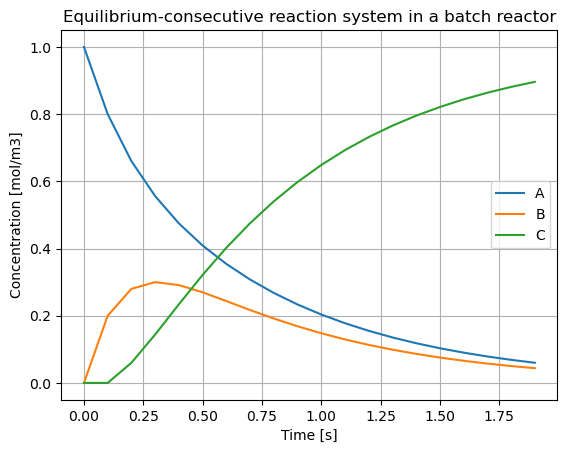

In [2]:
t = 0
c = np.array(c0)
print(f"t: {t:.4f}, c: {c}")

t_plot = t
c_plot = c.copy().reshape(-1,1)

while True:
    t_old = t
    c_old = c.copy()
        
    t += dt
    if t>t_end:
        break
    
    c = c_old + dt*reaction(t_old, c_old, k1, k_1, k2)
    
    print(f"t: {t:.4f}, c: {c}")
    t_plot = np.append(t_plot, t)
    c_plot = np.append(c_plot, c.copy().reshape(-1,1), axis=1)
        
for i in range(len(c)):
    plt.plot(t_plot, c_plot[i], label=chr(ord('A') + i))
plt.title('Equilibrium-consecutive reaction system in a batch reactor')
plt.xlabel('Time [s]')
plt.ylabel('Concentration [mol/m3]')
plt.legend()
plt.grid()
plt.show()

## b) Backward Euler Discretization

t: 0.0000, c: [1.000000000 0.000000000 0.000000000]
t: 0.1000, c: [0.843373494 0.120481928 0.036144578]
t: 0.2000, c: [0.718536798 0.188706634 0.092756568]
t: 0.3000, c: [0.617362759 0.222985133 0.159652108]
t: 0.4000, c: [0.534100227 0.235575127 0.230324646]
t: 0.5000, c: [0.464637247 0.234644697 0.300718056]
t: 0.6000, c: [0.405997961 0.225603064 0.368398975]
t: 0.7000, c: [0.355998465 0.212001969 0.431999566]
t: 0.8000, c: [0.313010872 0.196145817 0.490843311]
t: 0.9000, c: [0.275801086 0.179504310 0.544694604]
t: 1.0000, c: [0.243416838 0.162991198 0.593591963]
t: 1.1000, c: [0.215110056 0.147152293 0.637737651]
t: 1.2000, c: [0.190282716 0.132292026 0.677425259]
t: 1.3000, c: [0.168448798 0.118558418 0.712992784]
t: 1.4000, c: [0.149207325 0.105999916 0.744792759]
t: 1.5000, c: [0.132223040 0.094603232 0.773173729]
t: 1.6000, c: [0.117212397 0.084318365 0.798469238]
t: 1.7000, c: [0.103933248 0.075075010 0.820991741]
t: 1.8000, c: [0.092177138 0.066793170 0.841029692]
t: 1.9000, c

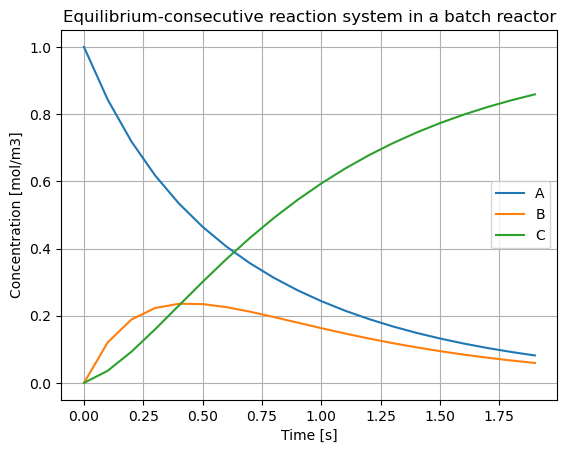

In [3]:
Jac_rxn = np.array([[-k1, k_1, 0], [k1, -(k_1+k2), 0], [0, k2, 0]])
A = np.identity(len(c0))/dt - Jac_rxn

t = 0
c = np.array(c0)
print(f"t: {t:.4f}, c: {c}")

t_plot = t
c_plot = c.copy().reshape(-1,1)

while True:
    t_old = t
    c_old = c.copy()
        
    t += dt
    if t>t_end:
        break
    
    b = c_old/dt    
    c = np.linalg.solve(A, b)
    
    print(f"t: {t:.4f}, c: {c}")
    t_plot = np.append(t_plot, t)
    c_plot = np.append(c_plot, c.copy().reshape(-1,1), axis=1)
        
for i in range(len(c)):
    plt.plot(t_plot, c_plot[i], label=chr(ord('A') + i))
plt.title('Equilibrium-consecutive reaction system in a batch reactor')
plt.xlabel('Time [s]')
plt.ylabel('Concentration [mol/m3]')
plt.legend()
plt.grid()
plt.show()

## c) Backward Euler Discretization 

t: 0.0000, c: [1.000000000 0.000000000 0.000000000]
t: 0.1000, c: [0.843373494 0.120481928 0.036144578]
t: 0.2000, c: [0.718536798 0.188706634 0.092756568]
t: 0.3000, c: [0.617362759 0.222985133 0.159652108]
t: 0.4000, c: [0.534100227 0.235575127 0.230324646]
t: 0.5000, c: [0.464637247 0.234644697 0.300718056]
t: 0.6000, c: [0.405997961 0.225603064 0.368398975]
t: 0.7000, c: [0.355998465 0.212001969 0.431999566]
t: 0.8000, c: [0.313010872 0.196145817 0.490843311]
t: 0.9000, c: [0.275801086 0.179504310 0.544694604]
t: 1.0000, c: [0.243416838 0.162991198 0.593591963]
t: 1.1000, c: [0.215110056 0.147152293 0.637737651]
t: 1.2000, c: [0.190282716 0.132292026 0.677425259]
t: 1.3000, c: [0.168448798 0.118558418 0.712992784]
t: 1.4000, c: [0.149207325 0.105999916 0.744792759]
t: 1.5000, c: [0.132223040 0.094603232 0.773173729]
t: 1.6000, c: [0.117212397 0.084318365 0.798469238]
t: 1.7000, c: [0.103933248 0.075075010 0.820991741]
t: 1.8000, c: [0.092177138 0.066793170 0.841029692]
t: 1.9000, c

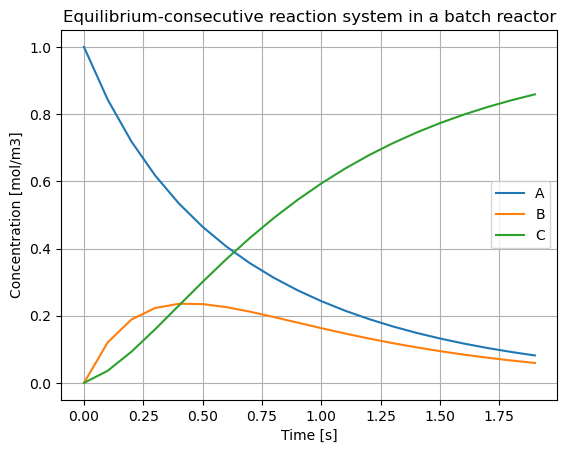

In [4]:
from pymrm import numjac_local, newton
import scipy.sparse as sps

nc = len(c0)
Jac_acc = sps.identity(nc, format='csr')/dt

def linearized_ODE(c, c_old, dt, fnc, *args):
    rxn, Jac_rxn = numjac_local(lambda c: fnc(None, c, *args), c, eps_jac=1e-6, axis=-1)
    Jac = Jac_acc - Jac_rxn
    g = (c - c_old)/dt - rxn
    return g, Jac

t = 0
c = np.array(c0)
print(f"t: {t:.4f}, c: {c}")

t_plot = t
c_plot = c.copy().reshape(-1,1)

while True:
    t_old = t
    c_old = c.copy()
        
    t += dt
    if t>t_end:
        break
    
    sol = newton(lambda c: linearized_ODE(c, c_old, dt, reaction, k1, k_1, k2),c)
    c = sol.x
    
    print(f"t: {t:.4f}, c: {c}")
    t_plot = np.append(t_plot, t)
    c_plot = np.append(c_plot, c.copy().reshape(-1,1), axis=1)
        
for i in range(len(c)):
    plt.plot(t_plot, c_plot[i], label=chr(ord('A') + i))
plt.title('Equilibrium-consecutive reaction system in a batch reactor')
plt.xlabel('Time [s]')
plt.ylabel('Concentration [mol/m3]')
plt.legend()
plt.grid()
plt.show()


## d) Using scipy.integrate.solve_ivp

t: 0.0000, c: [1.000000000 0.000000000 0.000000000]
t: 0.1000, c: [0.826411744 0.148903940 0.024684316]
t: 0.2000, c: [0.694040459 0.223945042 0.082014499]
t: 0.3000, c: [0.590231226 0.255083494 0.154685280]
t: 0.4000, c: [0.506756922 0.260731342 0.232511736]
t: 0.5000, c: [0.438206375 0.252092435 0.309701190]
t: 0.6000, c: [0.380892753 0.236078423 0.383028824]
t: 0.7000, c: [0.332364604 0.216629524 0.451005871]
t: 0.8000, c: [0.290809300 0.196235961 0.512954740]
t: 0.9000, c: [0.254945158 0.176244704 0.568810139]
t: 1.0000, c: [0.223750493 0.157405700 0.618843807]
t: 1.1000, c: [0.196669498 0.139966181 0.663364321]
t: 1.2000, c: [0.172905533 0.124109520 0.702984947]
t: 1.3000, c: [0.152098841 0.109807124 0.738094035]
t: 1.4000, c: [0.133847716 0.097012965 0.769139319]
t: 1.5000, c: [0.117872955 0.085651316 0.796475729]
t: 1.6000, c: [0.103816943 0.075587670 0.820595387]
t: 1.7000, c: [0.091421760 0.066691795 0.841886444]
t: 1.8000, c: [0.080503387 0.058834335 0.860662278]
t: 1.9000, c

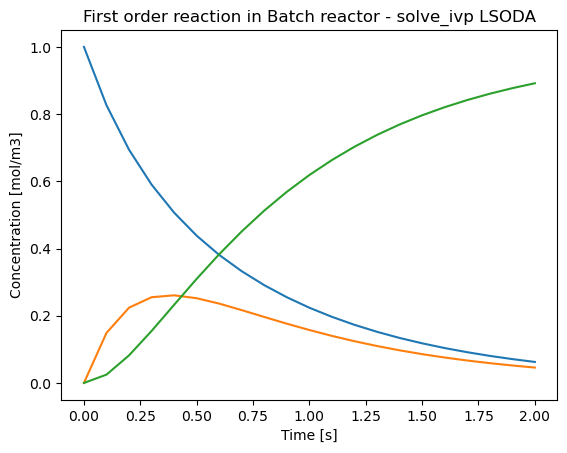

In [5]:
from scipy.integrate import solve_ivp

t_span = [0, t_end]
t_eval = np.linspace(0, t_end, 21)

sol = solve_ivp(lambda t, c: reaction(t, c, k1, k_1, k2), t_span, c0, method='LSODA', t_eval = t_eval) 
# explicit methods: method = 'RK45', 'RK23'
# implicit methods: method = 'Radau', 'BDF', 'LSODA'

for t, c in zip(sol.t, sol.y.T):
    print(f"t: {t:.4f}, c: {c}")

for i in range(len(sol.y)):
    plt.plot(sol.t, sol.y[i], label=chr(ord('A') + i))
plt.title('First order reaction in Batch reactor - solve_ivp LSODA')
plt.xlabel('Time [s]')
plt.ylabel('Concentration [mol/m3]')
plt.show()